In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import scanpy as sc
from downstream import *
import pickle
%load_ext autoreload
%autoreload 2

/home/batson/miniconda3/envs/mcv7/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
run_dir = '/mnt/ibm_lg/josh/mcv_workspace/runs/'

In [58]:
!ls -lah {run_dir}

total 22G
drwxrwxr-x 2 batson batson 4.0K Mar  6 13:24 .
drwxrwxr-x 5 batson batson 4.0K Mar  5 13:52 ..
-rw-rw-r-- 1 batson batson 513M Mar  4 22:41 bipolar_seurat_40.pickle
-rw-rw-r-- 1 batson batson 974M Mar  5 11:50 bipolar_seurat_80.pickle
-rw-rw-r-- 1 batson batson 2.9G Mar  6 13:25 bipolar_sqrt_300.pickle
-rw-rw-r-- 1 batson batson 511M Mar  4 22:45 bipolar_sqrt_40.pickle
-rw-rw-r-- 1 batson batson    0 Mar  5 11:57 bipolar_sqrt_80.pickle
-rw-rw-r-- 1 batson batson 5.0G Mar  5 17:55 blood_diffusion_10.pickle
-rw-rw-r-- 1 batson batson 146M Mar  4 22:15 blood_seurat_40.pickle
-rw-rw-r-- 1 batson batson 279M Mar  5 10:58 blood_seurat_80.pickle
-rw-rw-r-- 1 batson batson 818M Mar  6 12:45 blood_sqrt_300.pickle
-rw-rw-r-- 1 batson batson 145M Mar  4 22:19 blood_sqrt_40.pickle
-rw-rw-r-- 1 batson batson 270M Mar  5 11:06 blood_sqrt_80.pickle
-rw-rw-r-- 1 batson batson 1.1G Mar  4 22:52 kidney_seurat_150.pickle
-rw-rw-r-- 1 batson batson    0 Mar  5 12:07 kidney_seurat_300.pickle
-rw-

In [53]:
with open(run_dir + 'blood_sqrt_300.pickle', 'rb') as infile:
    denoised = pickle.load(infile)

In [33]:
with open(run_dir + 'symsim2k_sqrt_300.pickle', 'rb') as infile:
    denoised = pickle.load(infile)

In [ ]:
with open(run_dir + '.pickle', 'rb') as infile:
    denoised = pickle.load(infile)

In [63]:
pcs_to_show = [10, 20, 50, 100, 300]

In [64]:
k_range = fetch_scalar(denoised, 'denoiser_param')

In [81]:
k_idx = [i for (i, k) in enumerate(k_range) if k in pcs_to_show]

In [125]:
k_idx

[8, 13, 22, 32, 42]

In [78]:
from data import DATASETS

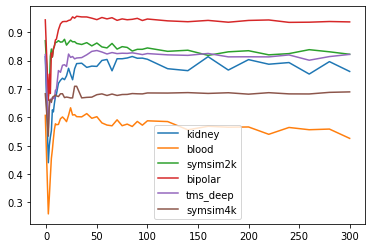

In [94]:
outputs = {}
for dataset in DATASETS:
    with open(run_dir + dataset + '_sqrt_300.pickle', 'rb') as infile:
        denoised = pickle.load(infile)
    opt_idx = np.argmin(fetch_scalar(denoised, 'mcv'))
    
    ari = fetch_scalar(denoised, 'imputed_ari')
    
    ari = [ari[opt_idx]] + ari
    outputs[dataset] = [ari[opt_idx]] + [ari[idx] for idx in k_idx]
    plt.plot(np.concatenate([[-1], k_range]), ari, label = dataset)
plt.legend()

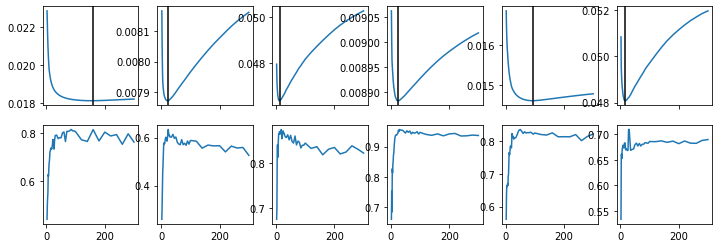

In [109]:
fig, ax = plt.subplots(2, 6, figsize = (12, 4), sharex='col')
for i, dataset in enumerate(DATASETS):
    with open(run_dir + dataset + '_sqrt_300.pickle', 'rb') as infile:
            denoised = pickle.load(infile)
    opt_idx = np.argmin(fetch_scalar(denoised, 'mcv'))
    ari = fetch_scalar(denoised, 'imputed_ari')
    mcv = fetch_scalar(denoised, 'mcv')
    ax[0,i].plot(k_range, mcv)
    ax[0,i].title(dataset)
    ax[1,i].plot(k_range, ari)
    ax[0,i].axvline(k_range[opt_idx], c ='k')

kidney 160 35
blood 22 14
symsim2k 12 9
bipolar 24 15
tms_deep 95 31
symsim4k 16 11


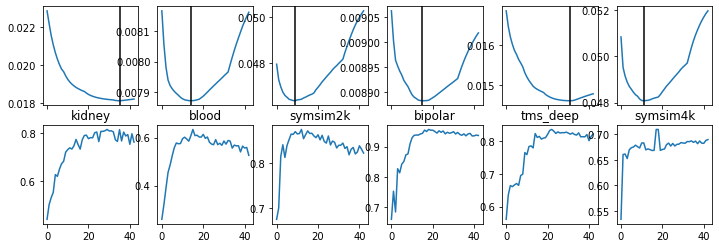

In [135]:
fig, ax = plt.subplots(2, 6, figsize = (12, 4), sharex='col')
for i, dataset in enumerate(DATASETS):
    with open(run_dir + dataset + '_sqrt_300.pickle', 'rb') as infile:
            denoised = pickle.load(infile)
    opt_idx = np.argmin(fetch_scalar(denoised, 'mcv'))
    print(dataset, k_range[opt_idx], opt_idx)
    ari = fetch_scalar(denoised, 'imputed_ari')
    mcv = fetch_scalar(denoised, 'mcv')
    ax[0,i].plot(mcv)
    ax[1,i].plot(ari)
    ax[1,i].set_title(dataset)
    ax[0,i].axvline(opt_idx, c ='k')

In [137]:
 with open(run_dir + 'blood' + '_sqrt_300.pickle', 'rb') as infile:
            denoised = pickle.load(infile)

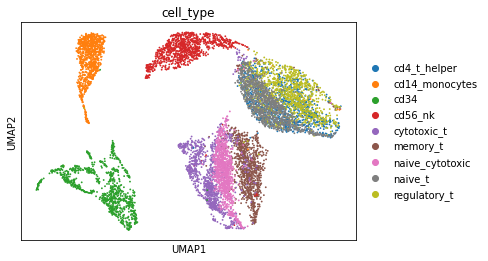

In [138]:
sc.pl.umap(denoised[14], color='cell_type')

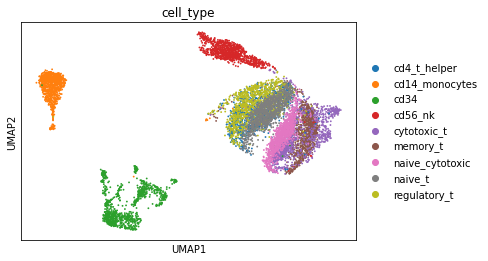

In [139]:
sc.pl.umap(denoised[-1], color='cell_type')

In [149]:
 with open(run_dir + 'bipolar' + '_sqrt_300.pickle', 'rb') as infile:
            denoised = pickle.load(infile)

In [154]:
bipolar_renaming = {'BC1A': 'BC1',
                    'BC1B': 'BC1',
                    'BC3A': 'BC3',
                    'BC3B': 'BC3',
                    'BC5A (Cone Bipolar cell 5A)': 'BC5',
                    'BC5B': 'BC5',
                    'BC5C': 'BC5',
                    'BC5D': 'BC5'
                    }

In [159]:
for adata in denoised:
    adata.obs['reduced_cell_type'] = adata.obs['CLUSTER'].apply(lambda x: bipolar_renaming[x] if x in bipolar_renaming else x)

In [170]:
for adata in denoised:
    adata.uns['imputed_ari_clust'] = adata.uns['imputed_ari']
    compute_ari(adata, 'reduced_cell_type')

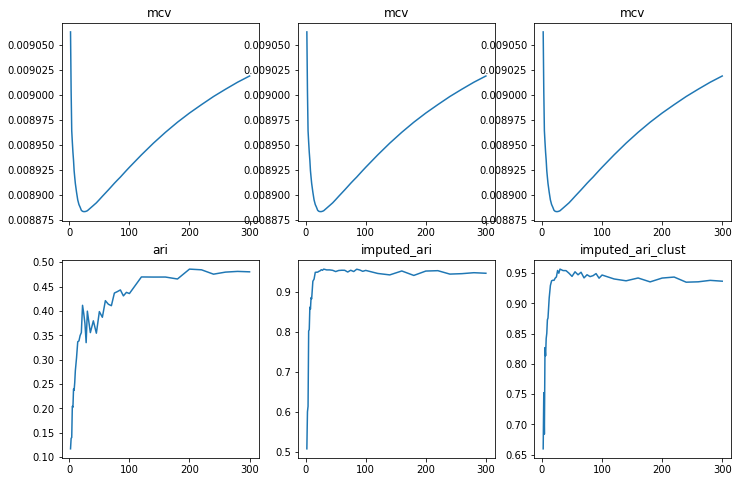

In [171]:
plot_scalars(denoised, ['mcv', 'mcv', 'mcv', 'ari', 'imputed_ari', 'imputed_ari_clust'])

In [173]:
max(fetch_scalar(denoised, 'imputed_ari')), max(fetch_scalar(denoised, 'imputed_ari_clust'))

(0.9561468938262089, 0.9565315607155123)

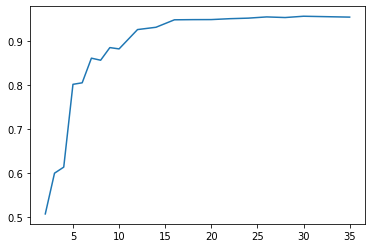

In [185]:
plt.plot(fetch_scalar(denoised, 'denoiser_param')[:20],
         fetch_scalar(denoised, 'imputed_ari')[:20])

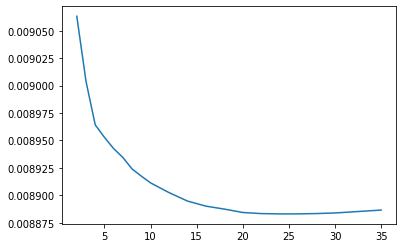

In [186]:
plt.plot(fetch_scalar(denoised, 'denoiser_param')[:20],
         fetch_scalar(denoised, 'mcv')[:20])

... storing 'reduced_cell_type' as categorical


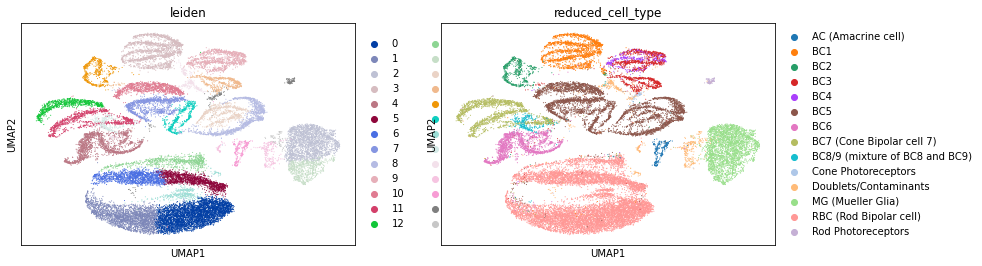

In [160]:
sc.pl.umap(denoised[15], color=['leiden', 'reduced_cell_type'])

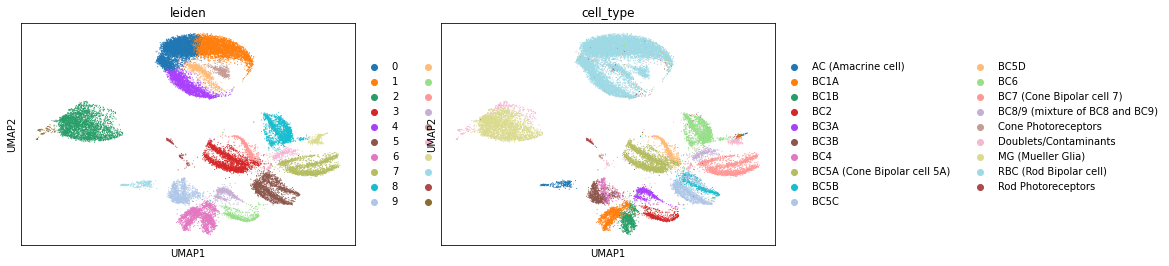

In [144]:
sc.pl.umap(denoised[-1], color=['leiden', 'cell_type'])

In [145]:
 with open(run_dir + 'kidney' + '_sqrt_300.pickle', 'rb') as infile:
            denoised = pickle.load(infile)

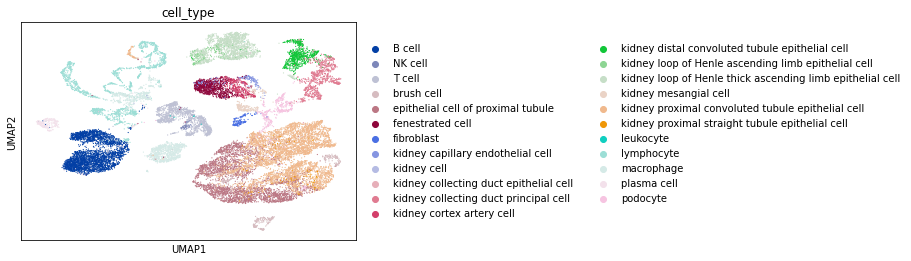

In [146]:
sc.pl.umap(denoised[32], color='cell_type')

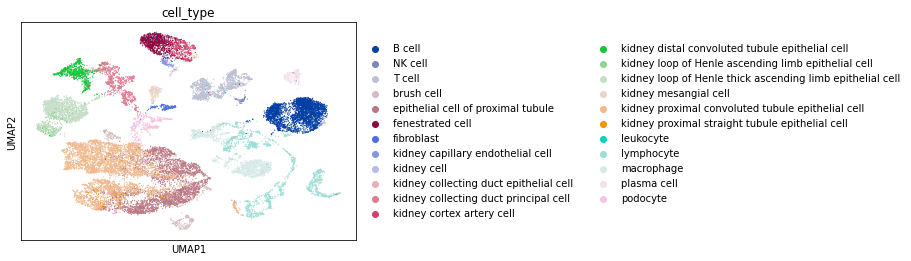

In [147]:
sc.pl.umap(denoised[-1], color='cell_type')

In [114]:
 with open(run_dir + 'bipolar' + '_sqrt_300.pickle', 'rb') as infile:
            denoised = pickle.load(infile)

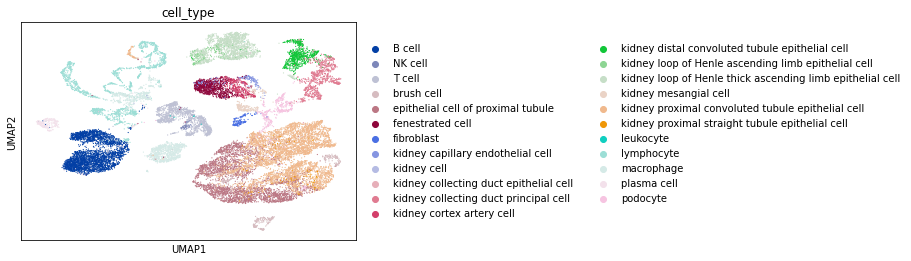

In [129]:
sc.pl.umap(denoised[32], color='cell_type')

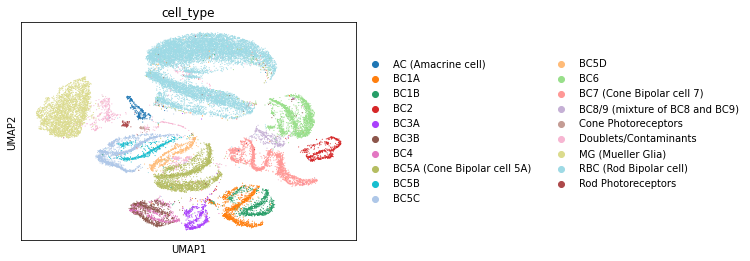

In [121]:
sc.pl.umap(denoised[18], color='cell_type')

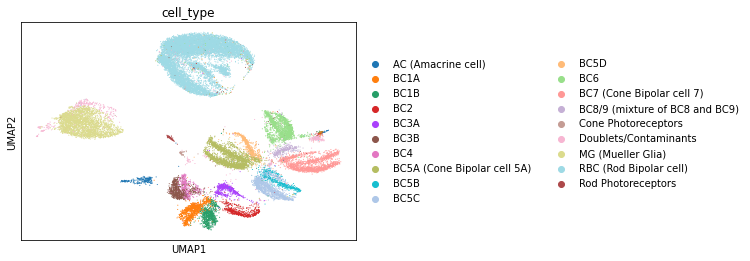

In [123]:
sc.pl.umap(denoised[-1], color='cell_type')

ValueError: x and y must have same first dimension, but have shapes (44,) and (6,)

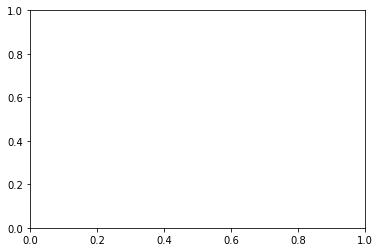

In [96]:
for dataset in outputs:
    plt.plot(np.concatenate([[-1], k_range]), outputs[dataset])

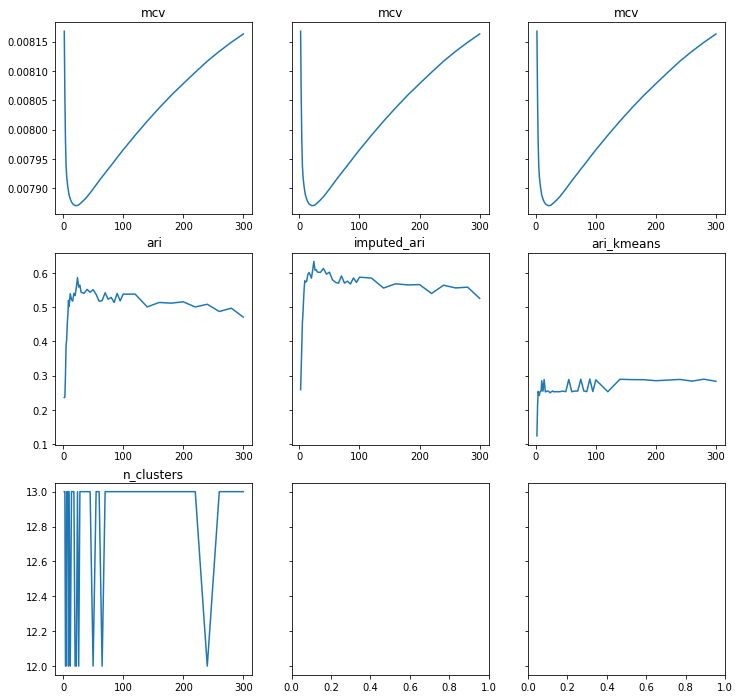

In [54]:
plot_scalars(denoised, ['mcv', 'mcv', 'mcv',
                        'ari', 'imputed_ari', 'ari_kmeans',
                        'n_clusters'],
            sharey='row')

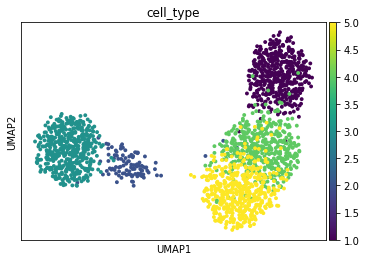

In [40]:
sc.pl.umap(denoised[-1], color='cell_type')

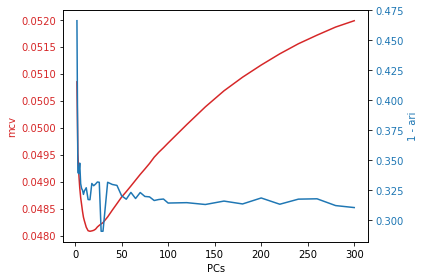

In [19]:
plot_mcv_ari(denoised)

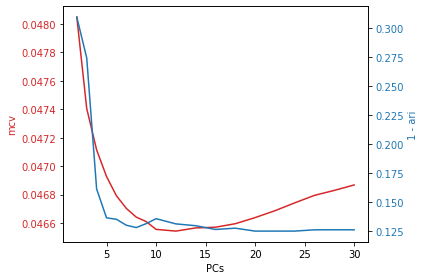

In [14]:
plot_mcv_ari(denoised, 'ari_kmeans')

In [13]:
with open(run_dir + 'symsim2k_diffusion_10.pickle', 'rb') as infile:
    denoised_diffusion = pickle.load(infile)

In [16]:
with open(run_dir + 'symsim2k_sqrt_300.pickle', 'rb') as infile:
    denoised_pca = pickle.load(infile)

[autoreload of sweep failed: Traceback (most recent call last):
  File "/home/batson/miniconda3/envs/mcv7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/batson/miniconda3/envs/mcv7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/batson/miniconda3/envs/mcv7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/batson/miniconda3/envs/mcv7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_r

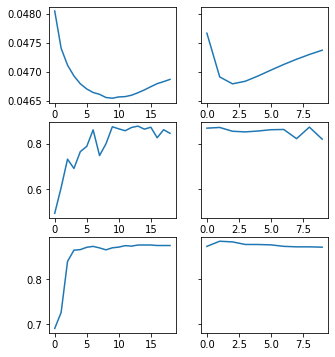

In [15]:
fig, ax = plt.subplots(3, 2, sharey = "row", figsize = (5, 6))

ax[0, 0].plot(fetch_scalar(denoised_pca, 'mcv'))
ax[0, 1].plot(fetch_scalar(denoised_diffusion, 'mcv'))
ax[1, 0].plot(fetch_scalar(denoised_pca, 'ari'))
ax[1, 1].plot(fetch_scalar(denoised_diffusion, 'ari'))

ax[2, 0].plot(fetch_scalar(denoised_pca, 'ari_kmeans'))
ax[2, 1].plot(fetch_scalar(denoised_diffusion, 'ari_kmeans'))

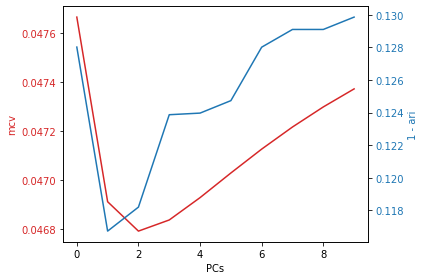

In [5]:
plot_mcv_ari(denoised, 'ari_kmeans')

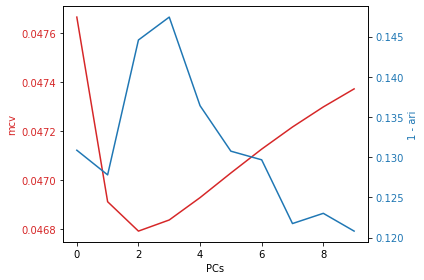

In [27]:
plot_mcv_ari(denoised)

In [34]:
fetch_scalar(denoised, 'ari')

NameError: name 'fetch_scalar' is not defined

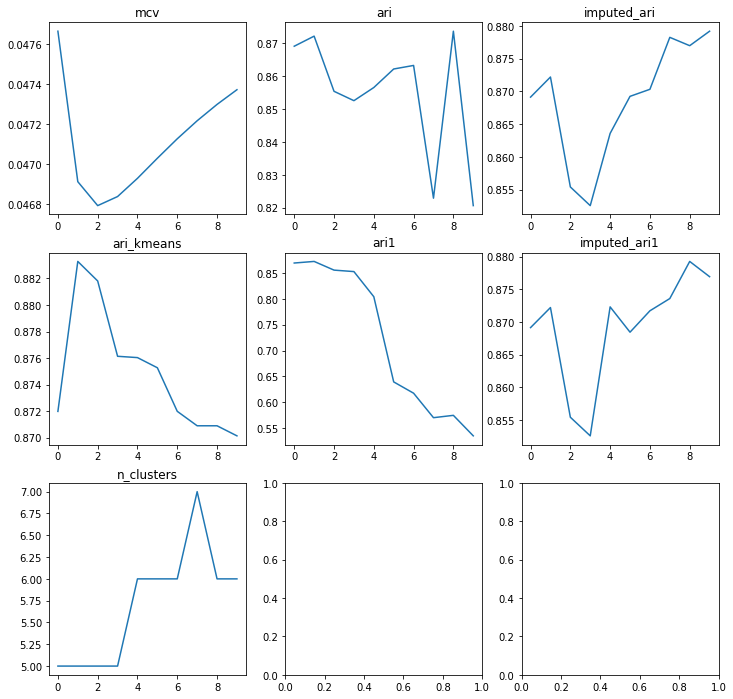

In [28]:
plot_scalars(denoised, ['mcv', 'ari', 'imputed_ari', 'ari_kmeans', 'ari1', 'imputed_ari1', 'n_clusters'])

In [19]:
with open('../runs/symsim2k_seurat_30.pickle', 'rb') as infile:
    denoised = pickle.load(infile)

FileNotFoundError: [Errno 2] No such file or directory: '../runs/symsim2k_seurat_30.pickle'

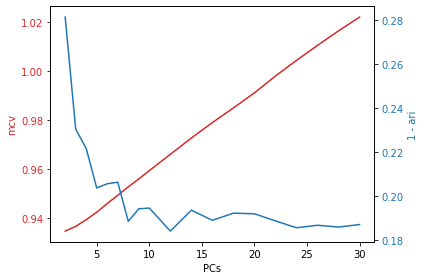

In [8]:
plot_mcv_ari(denoised, 'ari_kmeans')

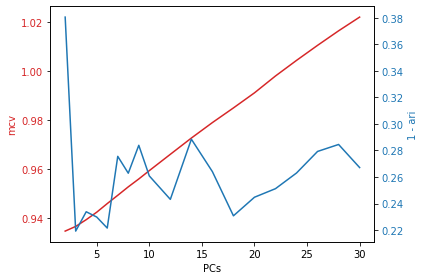

In [12]:
plot_mcv_ari(denoised)

# Bipolar

In [18]:
with open(run_dir + 'bipolar_sqrt_80.pickle', 'rb') as infile:
    denoised = pickle.load(infile)
plot_mcv_ari(denoised)

EOFError: Ran out of input

# Blood

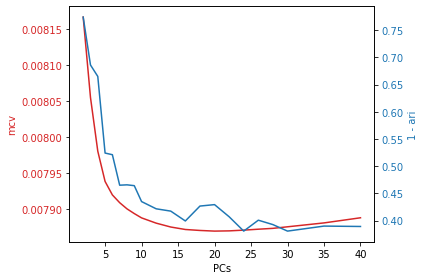

In [16]:
with open('../runs/blood_sqrt_8.pickle', 'rb') as infile:
    denoised = pickle.load(infile)
plot_mcv_ari(denoised)

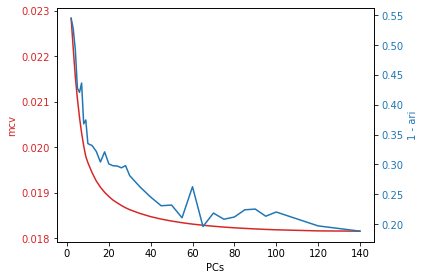

In [18]:
with open('../runs/kidney_sqrt_150.pickle', 'rb') as infile:
    denoised = pickle.load(infile)
plot_mcv_ari(denoised)

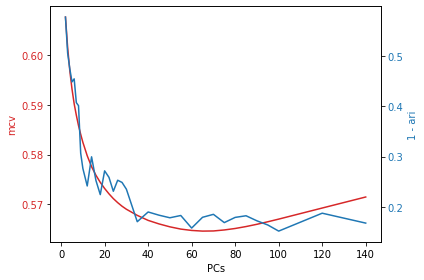

In [27]:
with open('../runs/kidney_seurat_150.pickle', 'rb') as infile:
    denoised = pickle.load(infile)
plot_mcv_ari(denoised)

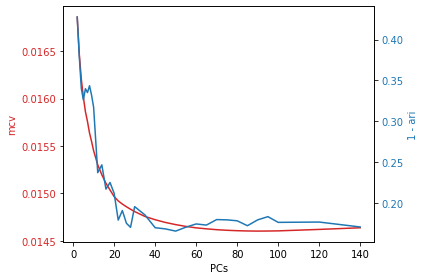

In [2]:
with open('../runs/tms_deep_sqrt_150.pickle', 'rb') as infile:
    denoised = pickle.load(infile)
plot_mcv_ari(denoised)

In [3]:
from downstream import compute_cluster

In [8]:
with open('../runs/symsim2k_sqrt_30.pickle', 'rb') as infile:
    denoised = pickle.load(infile)

In [ ]:
with open('../runs/symsim2k_diffusion.pickle', 'rb') as infile:
    denoised = pickle.load(infile)

In [14]:
aris = np.zeros((3, len(denoised)))
for i in range(3):
    cluster_denoised(denoised, 'cell_type',
                     adaptive=True,
                     kmeans=False,
                     random_state=i)
    for j in range(len(denoised)):
        aris[i, j] = denoised[j].uns['imputed_ari']



  0%|          | 0/19 [00:00<?, ?it/s]

There are 5 true clusters.




  5%|▌         | 1/19 [00:49<14:51, 49.52s/it]

 11%|█         | 2/19 [01:17<12:13, 43.14s/it]

 16%|█▌        | 3/19 [01:27<08:49, 33.07s/it]

 21%|██        | 4/19 [01:46<07:12, 28.83s/it]

 26%|██▋       | 5/19 [02:03<05:56, 25.47s/it]

 32%|███▏      | 6/19 [02:13<04:28, 20.64s/it]

 37%|███▋      | 7/19 [02:31<03:59, 19.97s/it]

 42%|████▏     | 8/19 [02:56<03:55, 21.44s/it]

 47%|████▋     | 9/19 [03:28<04:05, 24.52s/it]

 53%|█████▎    | 10/19 [03:53<03:43, 24.86s/it]

 58%|█████▊    | 11/19 [04:38<04:06, 30.86s/it]

 63%|██████▎   | 12/19 [04:57<03:10, 27.15s/it]

 68%|██████▊   | 13/19 [05:33<02:58, 29.77s/it]

 74%|███████▎  | 14/19 [06:13<02:45, 33.08s/it]

 79%|███████▉  | 15/19 [06:43<02:07, 31.99s/it]

 84%|████████▍ | 16/19 [06:53<01:16, 25.38s/it]

 89%|████████▉ | 17/19 [07:02<00:41, 20.62s/it]

 95%|█████████▍| 18/19 [07:20<00:19, 19.59s/it]

100%|██████████| 19/19 [07:35<00:00, 23.95s/it]


  0%|          | 0/19 [00:00<?, ?it/s]

There are 5 true clusters.




  5%|▌         | 1/19 [00:43<12:56, 43.11s/it]

 11%|█         | 2/19 [01:38<13:17, 46.91s/it]

 16%|█▌        | 3/19 [02:09<11:14, 42.14s/it]

 21%|██        | 4/19 [02:34<09:13, 36.88s/it]

 26%|██▋       | 5/19 [03:05<08:10, 35.05s/it]

 32%|███▏      | 6/19 [03:43<07:47, 35.92s/it]

 37%|███▋      | 7/19 [04:04<06:17, 31.46s/it]

 42%|████▏     | 8/19 [04:17<04:46, 26.02s/it]

 47%|████▋     | 9/19 [04:30<03:40, 22.09s/it]

 53%|█████▎    | 10/19 [04:38<02:41, 17.97s/it]

 58%|█████▊    | 11/19 [04:49<02:06, 15.77s/it]

 63%|██████▎   | 12/19 [05:05<01:50, 15.84s/it]

 68%|██████▊   | 13/19 [05:21<01:34, 15.82s/it]

 74%|███████▎  | 14/19 [05:29<01:08, 13.61s/it]

 79%|███████▉  | 15/19 [05:38<00:48, 12.23s/it]

 84%|████████▍ | 16/19 [06:14<00:57, 19.22s/it]

 89%|████████▉ | 17/19 [06:52<00:50, 25.06s/it]

 95%|█████████▍| 18/19 [07:15<00:24, 24.17s/it]

100%|██████████| 19/19 [07:52<00:00, 24.86s/it]


  0%|          | 0/19 [00:00<?, ?it/s]

There are 5 true clusters.




  5%|▌         | 1/19 [00:49<14:48, 49.36s/it]

 11%|█         | 2/19 [01:28<13:07, 46.32s/it]

 16%|█▌        | 3/19 [02:09<11:56, 44.77s/it]

 21%|██        | 4/19 [02:22<08:46, 35.09s/it]

 26%|██▋       | 5/19 [02:34<06:35, 28.27s/it]

 32%|███▏      | 6/19 [02:44<04:56, 22.83s/it]

 37%|███▋      | 7/19 [03:11<04:48, 24.08s/it]

 42%|████▏     | 8/19 [03:39<04:36, 25.13s/it]

 47%|████▋     | 9/19 [03:56<03:46, 22.68s/it]

 53%|█████▎    | 10/19 [04:16<03:17, 21.92s/it]

 58%|█████▊    | 11/19 [04:25<02:23, 17.98s/it]

 63%|██████▎   | 12/19 [04:33<01:45, 15.12s/it]

 68%|██████▊   | 13/19 [04:42<01:20, 13.38s/it]

 74%|███████▎  | 14/19 [05:11<01:29, 17.96s/it]

 79%|███████▉  | 15/19 [05:28<01:10, 17.70s/it]

 84%|████████▍ | 16/19 [05:37<00:45, 15.10s/it]

 89%|████████▉ | 17/19 [05:51<00:29, 14.79s/it]

 95%|█████████▍| 18/19 [06:07<00:15, 15.11s/it]

100%|██████████| 19/19 [06:31<00:00, 20.61s/it]
